<a href="https://colab.research.google.com/github/priyadharshinibd-collab/Projects-/blob/main/task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

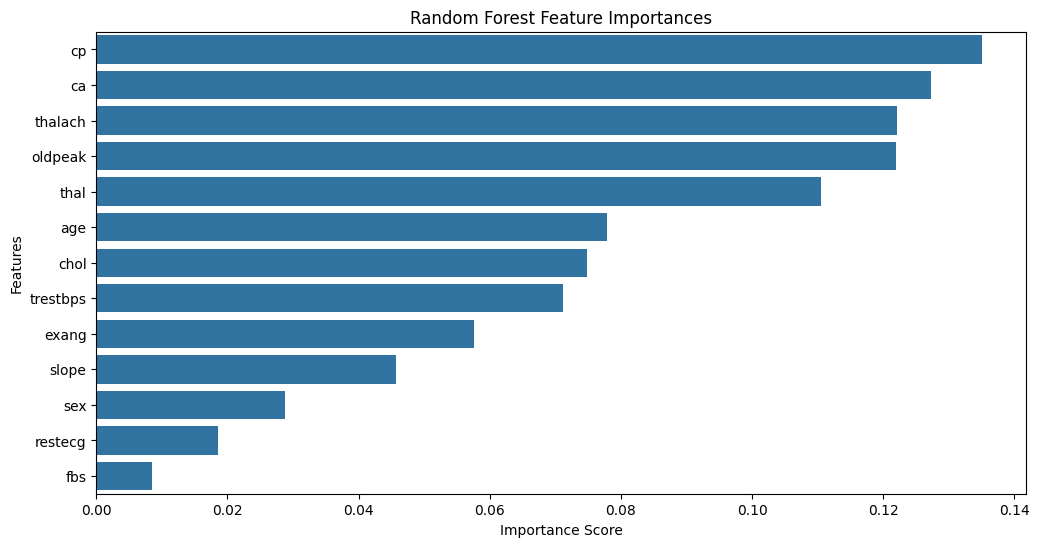

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_feature_importances.values, y=sorted_feature_importances.index)
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [14]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_classifier, X, y, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Print the mean and standard deviation of the cross-validation scores
print("Mean cross-validation accuracy:", cv_scores.mean())
print("Standard deviation of cross-validation accuracy:", cv_scores.std())

Cross-validation scores: [1.         1.         1.         1.         0.98536585]
Mean cross-validation accuracy: 0.9970731707317073
Standard deviation of cross-validation accuracy: 0.005853658536585371


## Explore feature importances

### Subtask:
Determine which features are most important in the Random Forest model's predictions.

**Reasoning**:
Determine feature importances by accessing the `feature_importances_` attribute, creating a Series, and sorting it.

In [12]:
# Access feature importances
feature_importances = rf_classifier.feature_importances_

# Create a Pandas Series with feature names as index
feature_importances_series = pd.Series(feature_importances, index=X_train.columns)

# Sort feature importances in descending order
sorted_feature_importances = feature_importances_series.sort_values(ascending=False)

# Print the sorted feature importances
print("Feature Importances (Random Forest):")
print(sorted_feature_importances)

Feature Importances (Random Forest):
cp          0.135072
ca          0.127327
thalach     0.122169
oldpeak     0.121905
thal        0.110518
age         0.077908
chol        0.074822
trestbps    0.071171
exang       0.057594
slope       0.045782
sex         0.028731
restecg     0.018557
fbs         0.008444
dtype: float64


## Evaluate the random forest model

### Subtask:
Evaluate the performance of the trained Random Forest model on the testing data.

**Reasoning**:
Evaluate the performance of the trained Random Forest model on the testing data by calculating and printing accuracy, classification report, and confusion matrix.

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the testing data
y_pred_rf = rf_classifier.predict(X_test)

# Calculate and print the accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

# Generate and print the classification report
class_report_rf = classification_report(y_test, y_pred_rf)
print("\nRandom Forest Classification Report:")
print(class_report_rf)

# Generate and print the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("\nRandom Forest Confusion Matrix:")
print(conf_matrix_rf)

Random Forest Accuracy: 0.9854

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205


Random Forest Confusion Matrix:
[[102   0]
 [  3 100]]


## Train a random forest classifier

### Subtask:
Train a Random Forest Classifier model on the training data.

**Reasoning**:
Train a Random Forest Classifier model on the training data.

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate a RandomForestClassifier object with default parameters
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

print("Random Forest Classifier trained successfully.")

Random Forest Classifier trained successfully.


In [2]:
import pandas as pd

# Assuming 'heart.csv' is the correct dataset file name from the extraction
try:
    df = pd.read_csv('/content/heart.csv')
    print("Data loaded successfully!")
    display(df.head())
except FileNotFoundError:
    print("Error: 'heart.csv' not found. Please check the extracted file names.")
except Exception as e:
    print(f"An error occurred while reading the CSV file: {e}")

Data loaded successfully!


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [1]:
import zipfile
import os

zip_path = '/content/archive (2).zip'
extract_path = '/content/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Files extracted to {extract_path}")

# List files in the extracted directory to identify the dataset file
os.listdir(extract_path)

Files extracted to /content/


['.config', 'archive (2).zip', 'heart.csv', 'sample_data']

# Task
Train a decision tree classifier on the dataset provided in "/content/archive (2).zip", visualize the trained tree, and evaluate the model's performance.

## Prepare the data

### Subtask:
Split the data into features (X) and target (y), and then split the data into training and testing sets.


**Reasoning**:
The subtask requires splitting the data into features and the target variable, and then splitting these into training and testing sets. This can be done in a single code block by first separating X and y, and then using train_test_split.



In [3]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets.")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Data split into training and testing sets.
Shape of X_train: (820, 13)
Shape of X_test: (205, 13)
Shape of y_train: (820,)
Shape of y_test: (205,)


## Train the decision tree classifier

### Subtask:
Train a Decision Tree Classifier model on the training data.


**Reasoning**:
Train a Decision Tree Classifier model on the training data.



In [4]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier object with default parameters
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
dt_classifier.fit(X_train, y_train)

print("Decision Tree Classifier trained successfully.")

Decision Tree Classifier trained successfully.


## Visualize the decision tree

### Subtask:
Visualize the trained decision tree.


**Reasoning**:
Visualize the trained decision tree using plot_tree.



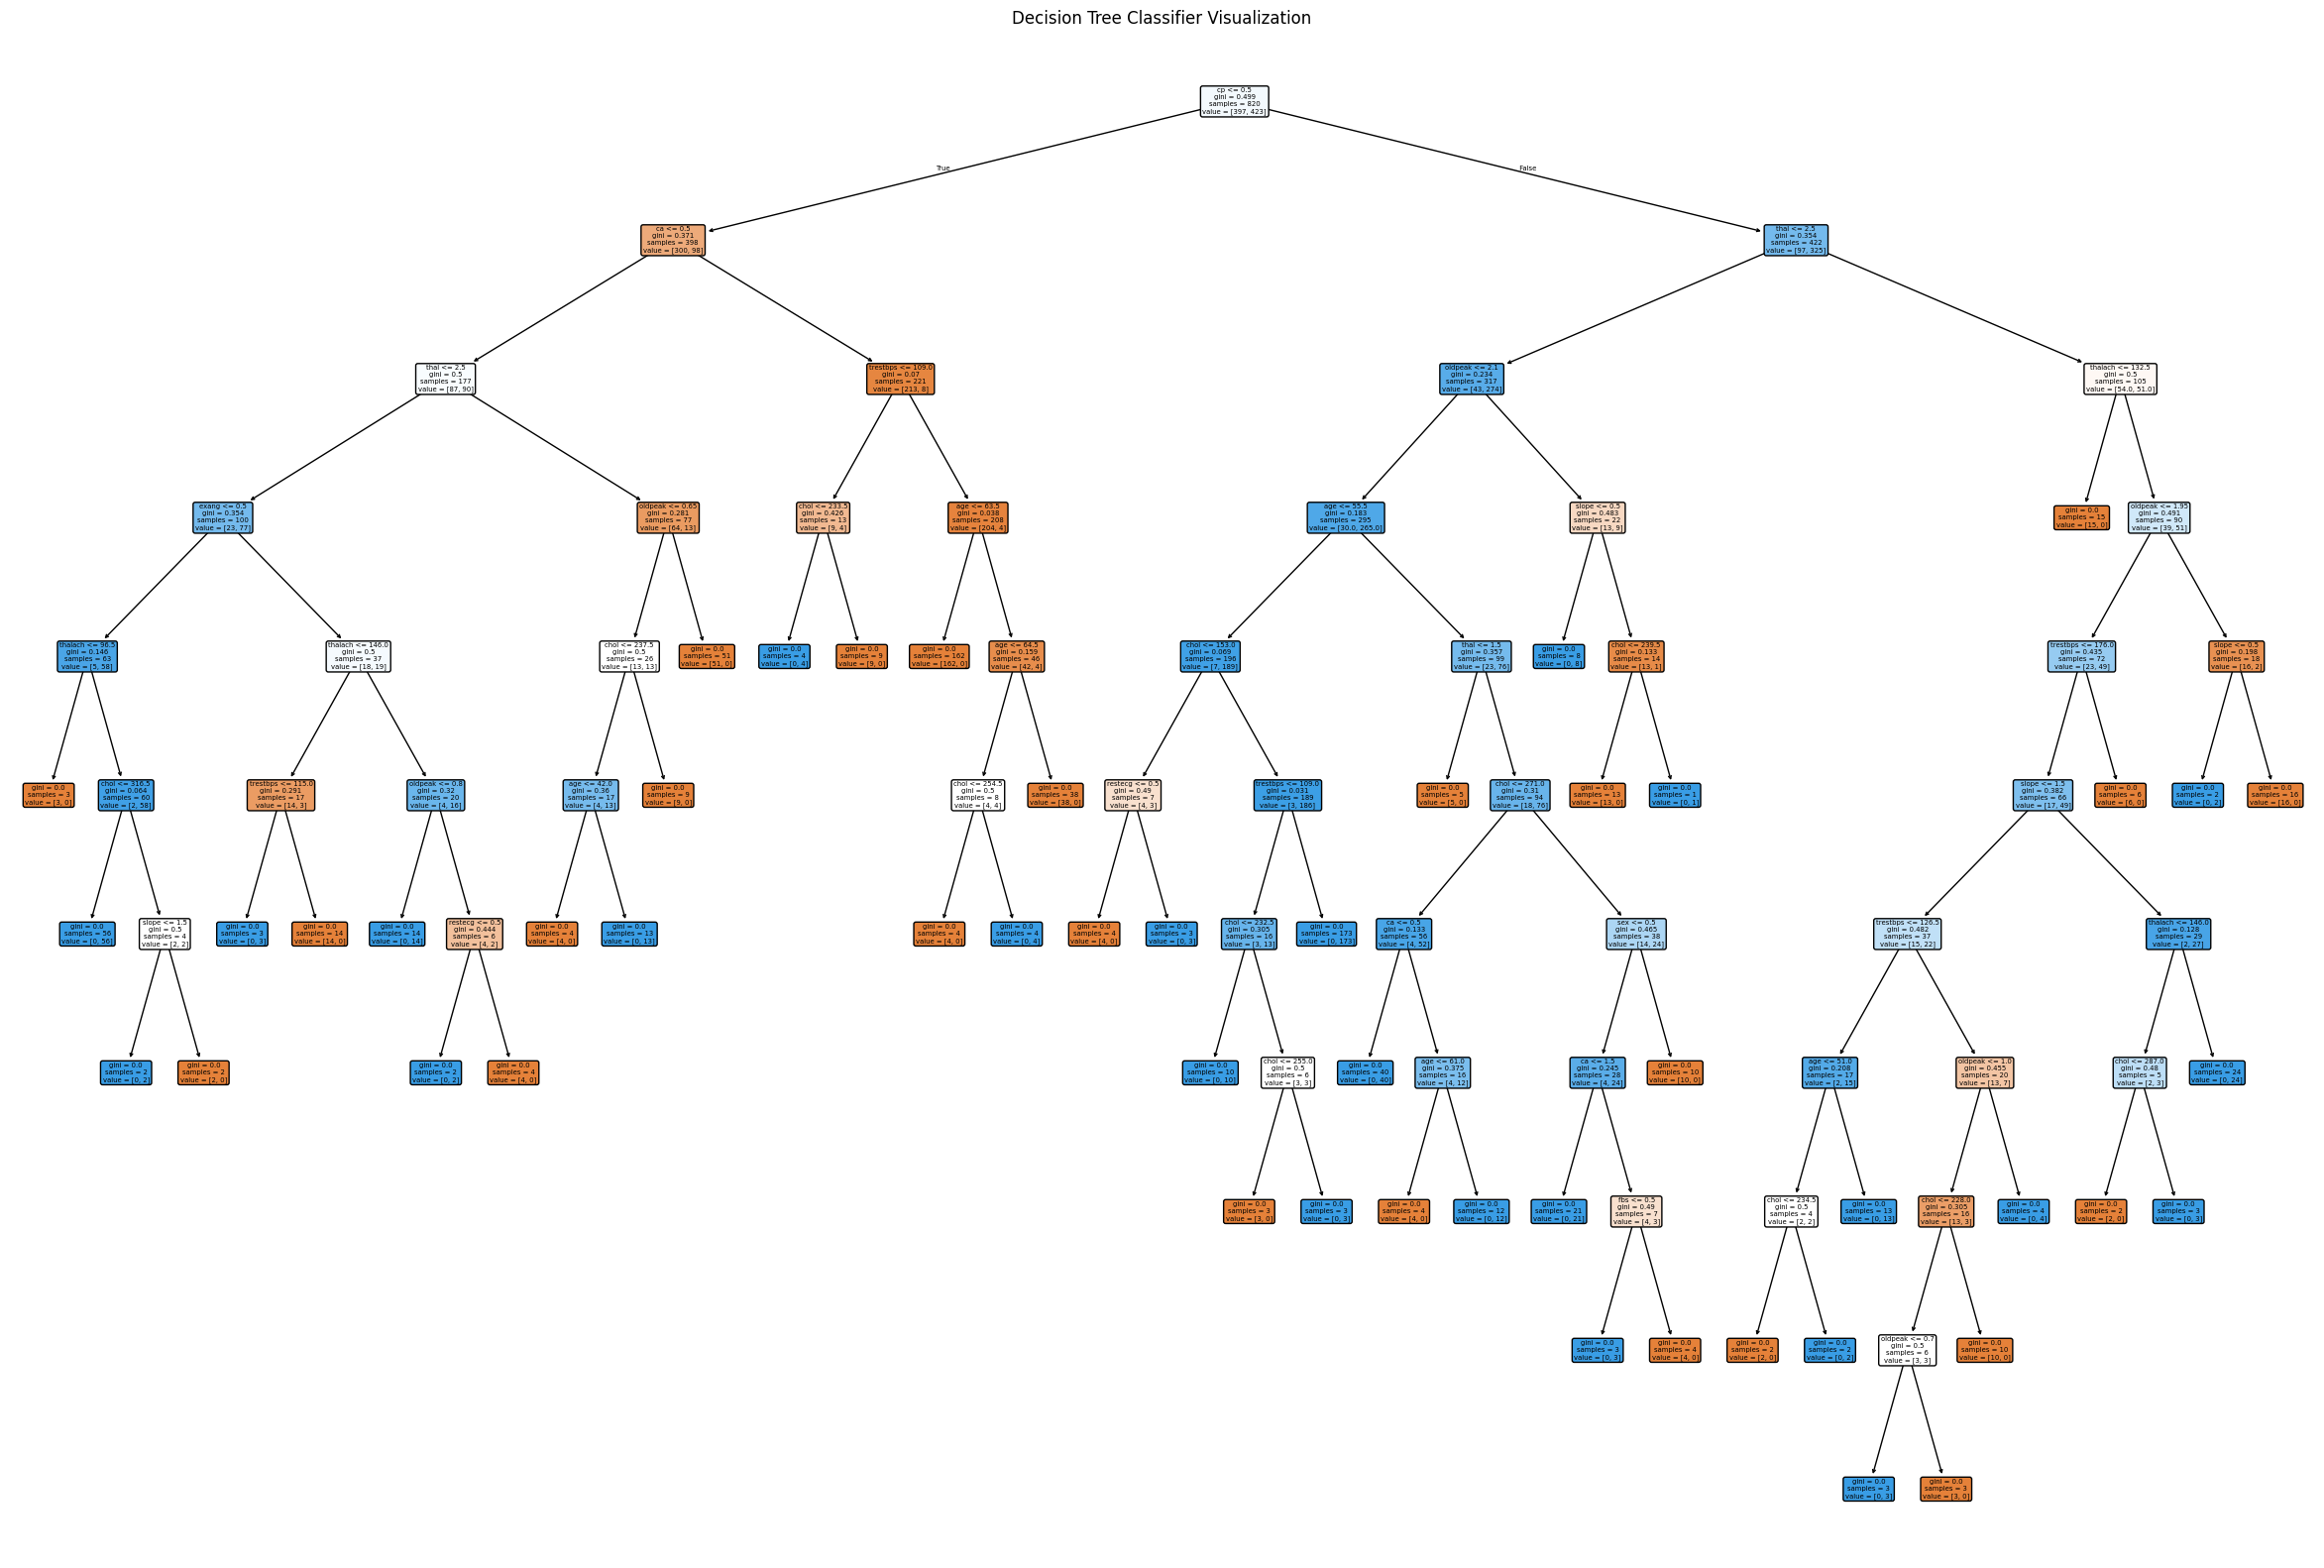

In [5]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 20))
plot_tree(dt_classifier, feature_names=X.columns, filled=True, rounded=True)
plt.title("Decision Tree Classifier Visualization")
plt.show()

## Evaluate the model

### Subtask:
Evaluate the performance of the trained model on the testing data.


**Reasoning**:
Evaluate the performance of the trained decision tree classifier on the testing data by calculating and printing accuracy, classification report, and confusion matrix.



In [6]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the testing data
y_pred = dt_classifier.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generate and print the classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.9854

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205


Confusion Matrix:
[[102   0]
 [  3 100]]


## Summary:

### Data Analysis Key Findings

*   The dataset was successfully split into training (820 samples) and testing (205 samples) sets.
*   A Decision Tree Classifier was trained on the training data.
*   The trained decision tree was successfully visualized.
*   The decision tree classifier achieved an accuracy of 0.9854 on the test set.
*   The classification report indicated high precision, recall, and f1-scores for both classes.
*   The confusion matrix showed that the model correctly classified 102 instances of class 0 and 100 instances of class 1, with only 3 misclassifications.

### Insights or Next Steps

*   The trained decision tree model demonstrates excellent performance on this dataset, suggesting it is a strong candidate for the classification task.
*   Further analysis could involve exploring feature importances from the trained tree to understand which features are most influential in the classification process.


# Task
Train a random forest classifier, evaluate the model, and explore feature importances using the dataset located at "/content/archive (2).zip".

## Train a random forest classifier

### Subtask:
Train a Random Forest Classifier model on the training data.


**Reasoning**:
Train a Random Forest Classifier model on the training data.



In [7]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate a RandomForestClassifier object with default parameters
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

print("Random Forest Classifier trained successfully.")

Random Forest Classifier trained successfully.


## Evaluate the random forest model

### Subtask:
Evaluate the performance of the trained Random Forest model on the testing data.


**Reasoning**:
Evaluate the performance of the trained Random Forest model on the testing data by calculating and printing accuracy, classification report, and confusion matrix.



In [8]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the testing data
y_pred_rf = rf_classifier.predict(X_test)

# Calculate and print the accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

# Generate and print the classification report
class_report_rf = classification_report(y_test, y_pred_rf)
print("\nRandom Forest Classification Report:")
print(class_report_rf)

# Generate and print the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("\nRandom Forest Confusion Matrix:")
print(conf_matrix_rf)

Random Forest Accuracy: 0.9854

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205


Random Forest Confusion Matrix:
[[102   0]
 [  3 100]]


## Explore feature importances

### Subtask:
Determine which features are most important in the Random Forest model's predictions.


**Reasoning**:
Determine feature importances by accessing the `feature_importances_` attribute, creating a Series, and sorting it.



In [9]:
# Access feature importances
feature_importances = rf_classifier.feature_importances_

# Create a Pandas Series with feature names as index
feature_importances_series = pd.Series(feature_importances, index=X_train.columns)

# Sort feature importances in descending order
sorted_feature_importances = feature_importances_series.sort_values(ascending=False)

# Print the sorted feature importances
print("Feature Importances (Random Forest):")
print(sorted_feature_importances)

Feature Importances (Random Forest):
cp          0.135072
ca          0.127327
thalach     0.122169
oldpeak     0.121905
thal        0.110518
age         0.077908
chol        0.074822
trestbps    0.071171
exang       0.057594
slope       0.045782
sex         0.028731
restecg     0.018557
fbs         0.008444
dtype: float64
